In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.drop('PassengerId',axis=1,inplace=True)
df_test.drop('PassengerId',axis=1,inplace=True)

In [6]:
df_train.drop('Cabin', axis = 1, inplace = True)
df_test.drop('Cabin', axis = 1, inplace = True)

In [7]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)

In [8]:
df_train.isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Sex           0
Pclass        0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [9]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
def ticket_cleaning(x):
    numbers = ''
    for i in x:
        if i.isdigit():
            numbers += i
    if numbers == '':
        return 0
    return int(numbers)

In [11]:
df_train['Ticket'] = df_train['Ticket'].apply(ticket_cleaning)
df_test['Ticket'] = df_test['Ticket'].apply(ticket_cleaning)

In [12]:
df_train['Embarked'].fillna(df_train['Embarked'].value_counts().index[0], inplace=True)

In [13]:
df_train['Age'] = df_train['Age'].interpolate()
df_test['Age'] = df_test['Age'].interpolate()

In [14]:
df_test['Fare'].fillna(df_test['Fare'].value_counts().index[0], inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label = LabelEncoder()

In [17]:
for column in df_train.columns:
    if df_train[column].dtype == object:
        label = LabelEncoder()
        df_train[column] = label.fit_transform(df_train[column])
        df_test[column] = label.transform(df_test[column])

# LogisticRegression + Pipeline + StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [19]:
scaler = StandardScaler()

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
from sklearn.pipeline import Pipeline

In [25]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [26]:
pipe

,steps,"[('poly', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [27]:
params = [
    {
        'model__penalty': ['l1'],
        'model__solver': ['liblinear', 'saga'],
        'model__max_iter': [100, 500, 1000]
    },
    {
        'model__penalty': ['l2'],
        'model__solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'model__max_iter': [100, 500, 1000]
    },
    {
        'model__penalty': ['elasticnet'],
        'model__solver': ['saga'],
        'model__max_iter': [100, 500, 1000],
        'model__l1_ratio': [0.15, 0.5, 0.85]
    },
    {
        'model__penalty': ['none'],
        'model__solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'model__max_iter': [100, 500, 1000]
    }
]


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
final_model = GridSearchCV(pipe, param_grid=params, cv=3,n_jobs=-1)

In [30]:
X_train = df_train.drop('Survived', axis = 1)
X_test = df_test.copy()
y_train = df_train['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=41)

In [33]:
final_model.fit(X_train, y_train)

,estimator,Pipeline(step...egression())])
,param_grid,"[{'model__max_iter': [100, 500, ...], 'model__penalty': ['l1'], 'model__solver': ['liblinear', 'saga']}, {'model__max_iter': [100, 500, ...], 'model__penalty': ['l2'], 'model__solver': ['liblinear', 'lbfgs', ...]}, ...]"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,degree,2


In [34]:
final_model.best_params_

{'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}

In [35]:
y_pred = final_model.predict(X_val)

In [36]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [37]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       105
           1       0.87      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.85      0.84      0.84       179



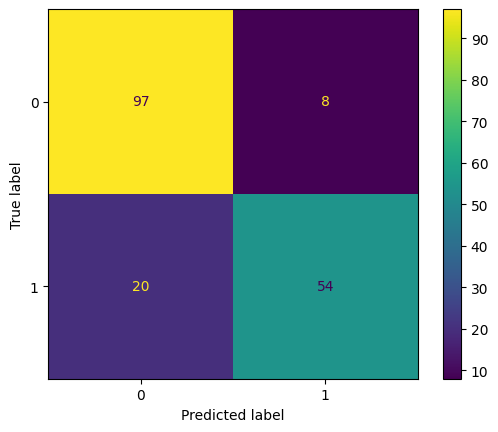

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

In [37]:
df_sub = pd.read_csv('gender_submission.csv')
finaly_y = final_model.predict(X_test)
df_sub['Survived'] = finaly_y
df_sub.to_csv('submission1.csv', index=False, index_label=False)

# RandomForestClassifier + GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [19]:
X_train = df_train.drop('Survived', axis = 1)
X_test = df_test.copy()
y_train = df_train['Survived']

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=41)

In [21]:
model = RandomForestClassifier()

In [22]:
params = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, None]
}

In [23]:
final_model = GridSearchCV(model, param_grid=params, cv=3, verbose=2)

In [24]:
final_model.fit(X_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.6s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.7s
[CV] END ......................max_depth=2, n_estimators=200; total time=   0.5s
[CV] END ......................max_depth=2, n_estimators=250; total time=   0.7s
[CV] END ......................max_depth=2, n_estimators=250; total time=   0.7s
[CV] END ......................max_depth=2, n_e

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [2, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [25]:
y_pred = final_model.predict(X_val)

In [26]:
final_model.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [27]:
print(classification_report(y_pred,y_val))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       124
           1       0.72      0.96      0.82        55

    accuracy                           0.87       179
   macro avg       0.85      0.90      0.86       179
weighted avg       0.90      0.87      0.88       179



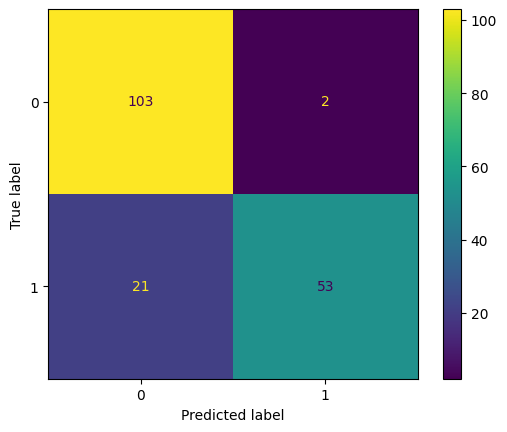

In [28]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

In [28]:
final_y = final_model.predict(X_test)
df_sub = pd.read_csv('gender_submission.csv')
df_sub['Survived'] = final_y
df_sub.to_csv('submission2.csv', index=False, index_label=False)